# Project 5

### 1. Data Import and Cleaning

Import library

In [2]:
import pandas as pd
import numpy as np
import statistics as stat
from matplotlib import pyplot as plt

Import data and check for basic info

In [3]:
# Reading data into dataframe and look at information about data
df = pd.read_csv('/Users/chaoli/Downloads/Project-5/games.csv')
display(df.head())
df.info()
# Checking for duplicate data
display(df.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


0

Fix missing value for data

In [4]:
# Fill missing value in Name column with 'Missing Name'
df['Name'] = df['Name'].fillna('Missing Name')
# Fill missing value in Genre with 'unknown_Genre'
df['Genre'] = df['Genre'].fillna('unknown_genre')
# Fill missing value in Year_of_Release with its median by Genre and Platform to optimize future analyze. Then turn it into integer.
df['Year_of_Release'] = df['Year_of_Release'].fillna(df.groupby(['Platform', 'Genre'])['Year_of_Release'].transform('median'))
df['Year_of_Release'] = df['Year_of_Release'].astype('int')
# Fill missing value of Critic_Score with mean critic score by Genre and Platform
df['Critic_Score'] = df['Critic_Score'].fillna(df.groupby(['Platform', 'Genre'])['Critic_Score'].transform('mean'))
# Fill missing value of Ratjng, fill with unknown_rating
df['Rating'] = df['Rating'].fillna('unknown_rating')
display(df.head(5))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown_rating


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16715 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16715 non-null  int64  
 3   Genre            16715 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     15581 non-null  float64
 9   User_Score       10014 non-null  object 
 10  Rating           16715 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [5]:
#Seeking for reasons why there is still null for Critic_Score
display(df.loc[df['Critic_Score'].isna()])
display(df.groupby(['Platform', 'Genre']).mean('Critic_Score'))
#If grouping by platform and Genre, there exist whole group have no Critic_Sore hence have no mean
#Fill the rest missing value with overall mean for Critic_score
df['Critic_Score'] = df['Critic_Score'].fillna(stat.mean(df['Critic_Score'].dropna()))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown_rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown_rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown_rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown_rating
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,unknown_rating
...,...,...,...,...,...,...,...,...,...,...,...
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,NaN,NaN,unknown_rating
16553,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,unknown_rating
16693,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,NaN,NaN,unknown_rating
16694,Carmageddon 64,N64,1999,Action,0.01,0.00,0.00,0.00,NaN,NaN,unknown_rating


Year_of_Release  NA_sales  EU_sales  JP_sales  \
Platform Genre                                                         
2600     Action            1982.049180  0.449016  0.026885  0.000000   
         Adventure         1983.000000  0.795000  0.050000  0.000000   
         Fighting          1980.000000  0.580000  0.035000  0.000000   
         Misc              1980.400000  0.668000  0.040000  0.000000   
         Platform          1981.777778  1.375556  0.080000  0.000000   
...                                ...       ...       ...       ...   
XOne     Role-Playing      2015.071429  0.439286  0.245000  0.000714   
         Shooter           2015.026316  0.970000  0.468421  0.004211   
         Simulation        2015.000000  0.080000  0.077500  0.000000   
         Sports            2014.815789  0.410263  0.229737  0.000526   
         Strategy          2014.666667  0.090000  0.036667  0.000000   

                       Other_sales  Critic_Score  
Platform Genre                                    
2600     Action           0.003607           NaN  
         Adventure        0.005000           NaN  
         Fighting         0.005000           NaN  
         Misc             0.006000           NaN  
         Platform         0.017778           NaN  
...                            ...           ...  
XOne     Role-Playing     0.068571     80.777778  
         Shooter          0.145000     77.656250  
         Simulation       0.015000     59.000000  
         Sports           0.063158     71.093750  
         Strategy         0.013333     70.000000  

[294 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16715 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16715 non-null  int64  
 3   Genre            16715 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     16715 non-null  float64
 9   User_Score       10014 non-null  object 
 10  Rating           16715 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
# For user score, there exist two kinds of non-numeric value, TBD and Nan. Those have to be fixed to trun datatype of score to float for calculation purpose
# For TBD, it would be turned into Nan in order to turn User_Score into float type for calculation purpose
# For Nan, it would be filled with average user score by platform and Genre since the later analysize would be based on the difference between each other
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score'] = df['User_Score'].fillna(df.groupby(['Platform', 'Genre'])['User_Score'].transform('mean'))
# Fill rest null with overall mean
df['User_Score'] = df['User_Score'].fillna(stat.mean(df['User_Score'].dropna()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16715 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16715 non-null  int64  
 3   Genre            16715 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     16715 non-null  float64
 9   User_Score       16715 non-null  float64
 10  Rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#Fix column name to lower-case
df = df.rename(columns ={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})
#Add columns for total sale
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### 2. Data Analyze

##### 2.1. Game Numbers vs Year 

,year_of_release,count
0,1980,10
1,1981,50
2,1982,47
3,1983,18
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


<AxesSubplot: ylabel='Frequency'>

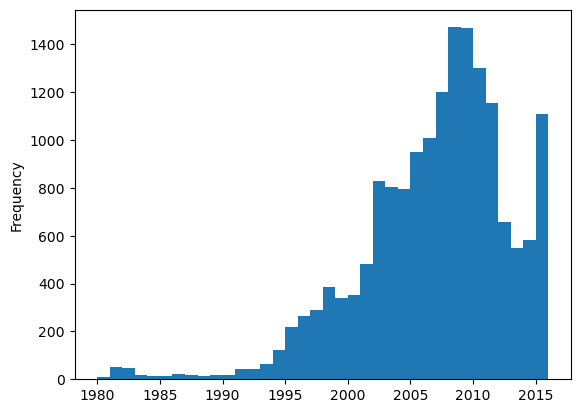

In [13]:
#group game by years
game_no_by_year = df.groupby('year_of_release').count()['name'].reset_index()
game_no_by_year = game_no_by_year.rename(columns={'name': 'count'})
display(game_no_by_year)
df['year_of_release'].plot(
    kind='hist',
    bins=36,
    xlabel='Year'
)

According to graph, the game industry is stable between 1980 and 1990. Starting from 1995, it grows quickly until 2010. Then it starts dropping until 2015.

##### 2.2. History of gaming industry from platform to platform
    
    In this section, we will have a look at how sells of different platforms change in the past and trying to figure out the lifetime of the platforms.

In [9]:
#Find out the must popular game in the history.
print(df.groupby('platform').sum('total_sales')['total_sales'])
print(df.groupby('platform').sum('total_sales')['total_sales'].max())
# Grouping data by year and platform to get the total sales change for all platform of different years.
sale_plat_year = df.groupby(['platform', 'year_of_release']).sum('total_sales')['total_sales'].to_frame().reset_index()
platforms = df['platform'].unique()
#
display(platforms)
for platform in platforms:
    print(sale_plat_year.loc[sale_plat_year['platform'] == platform])
    print()

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64
1255.77


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

    platform  year_of_release  total_sales
197      Wii             2006       137.15
198      Wii             2007       152.77
199      Wii             2008       171.73
200      Wii             2009       222.89
201      Wii             2010       127.95
202      Wii             2011        59.65
203      Wii             2012        21.71
204      Wii             2013         8.59
205      Wii             2014         3.75
206      Wii             2015         1.14
207      Wii             2016         0.18

   platform  year_of_release  total_sales
77      NES             1983        10.96
78      NES             1984        50.08
79      NES             1985        53.44
80      NES             1986        36.41
81      NES             1987        19.76
82      NES             1988        45.01
83      NES             1989         7.85
84      NES             1990        15.73
85      NES             1991         6.11
86      NES             1992         1.98
87      NES          

According to data, PS2 is the most popular overall that achieved 125.77 million USD.

This part would print the graph of sell by year from different platforms. It will vistualize the change of selling situation for platforms.

/Users/chaoli/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


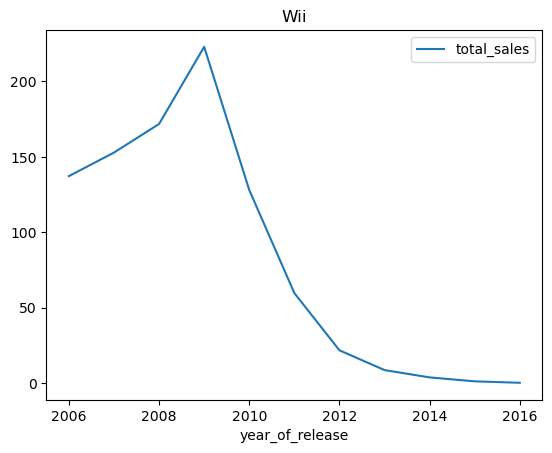

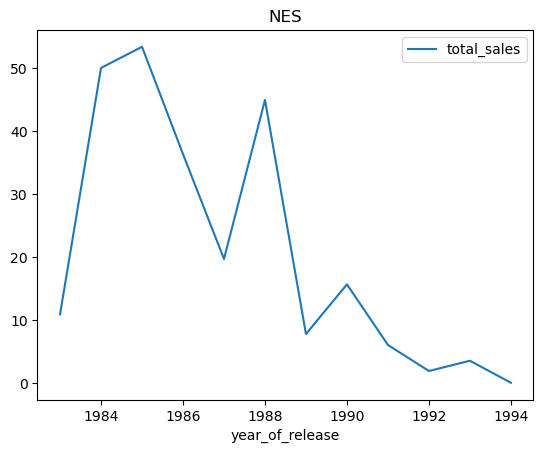

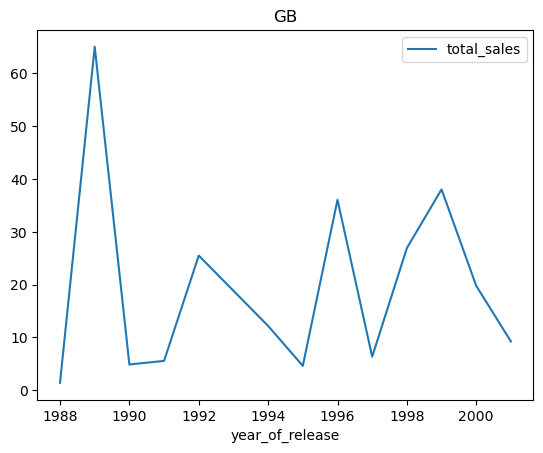

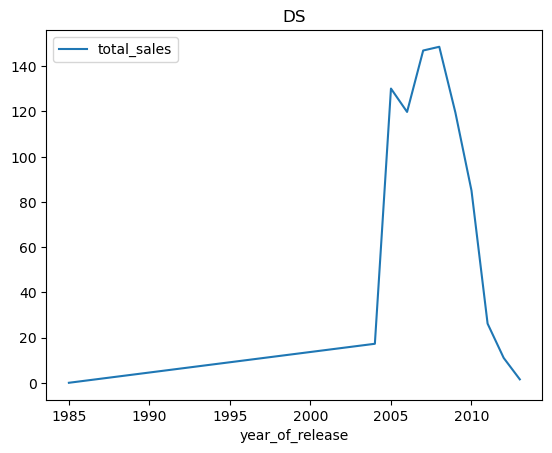

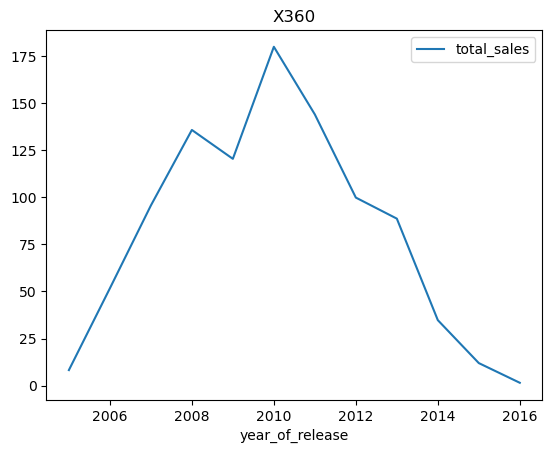

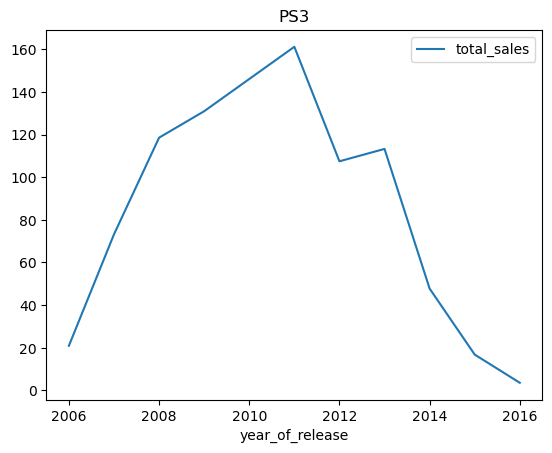

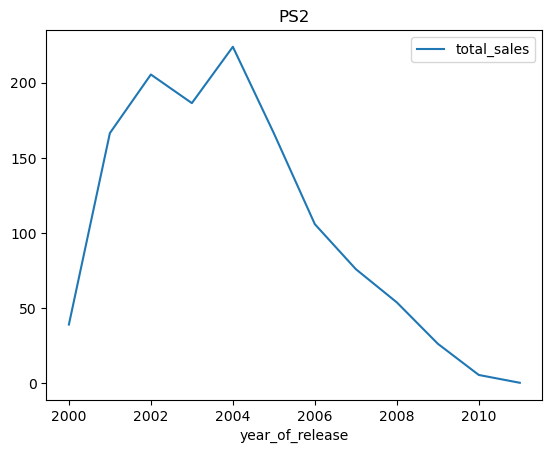

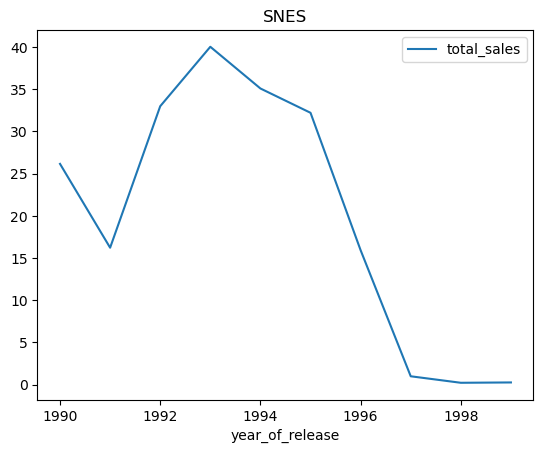

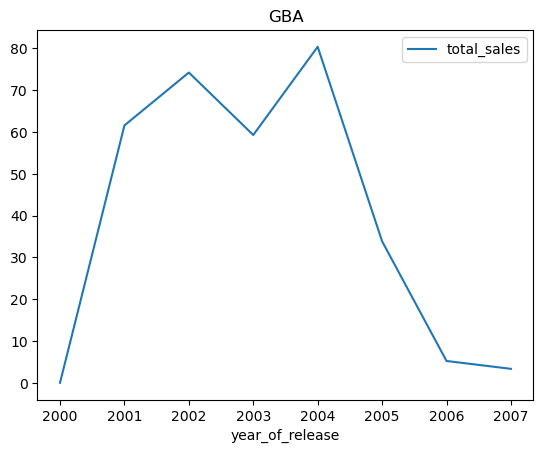

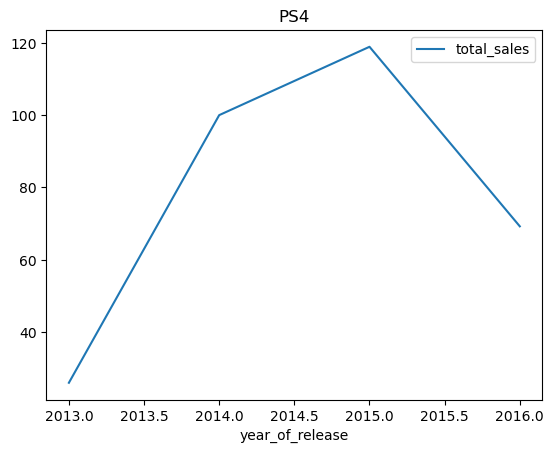

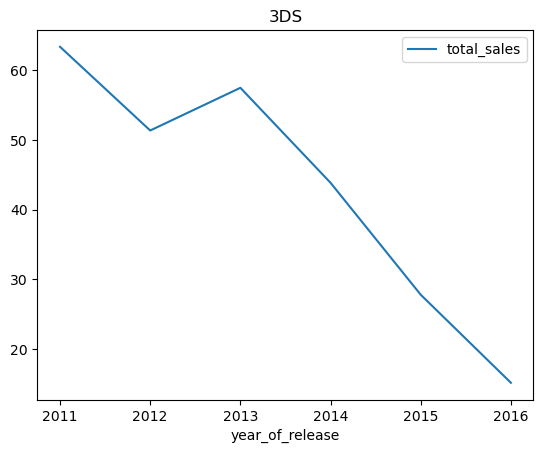

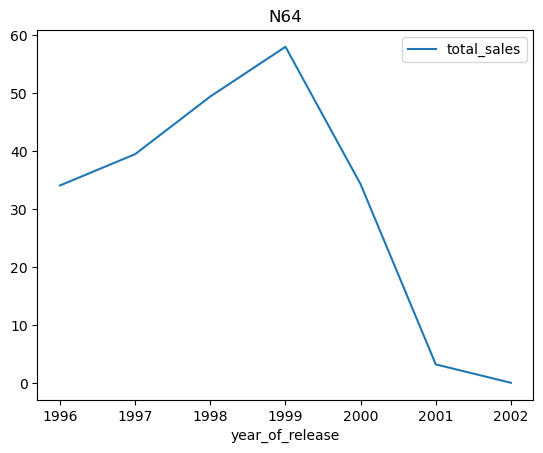

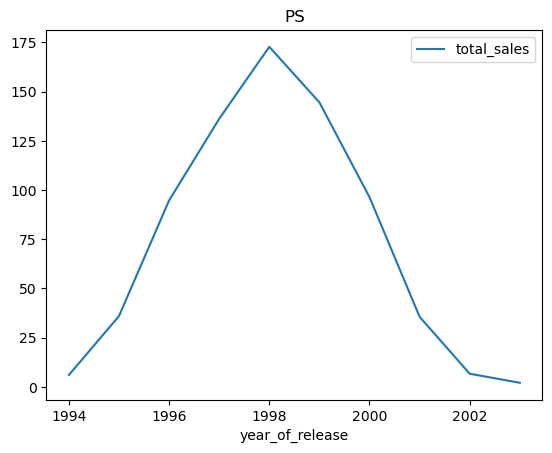

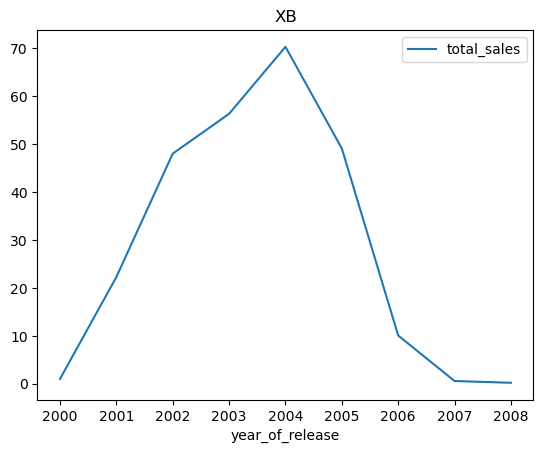

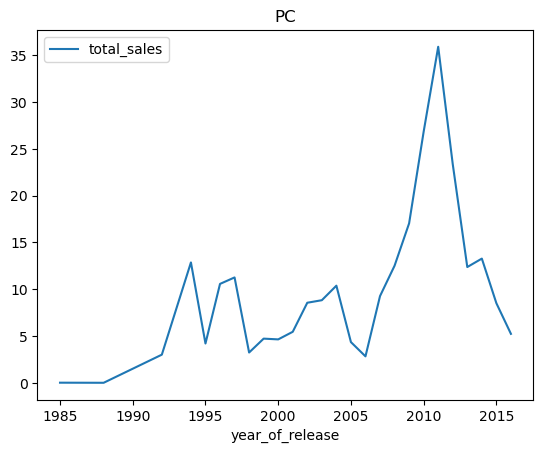

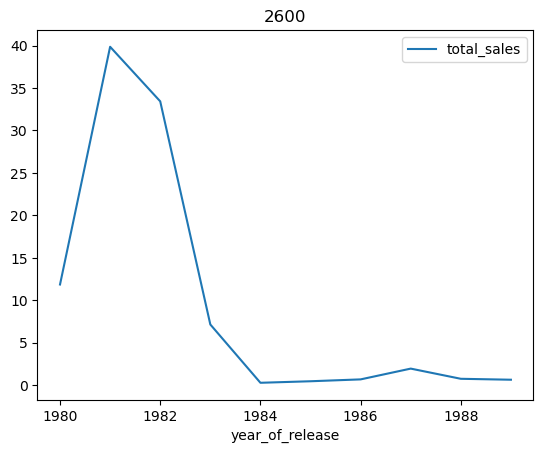

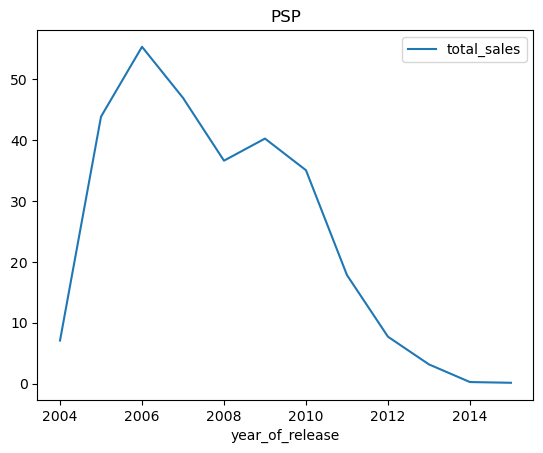

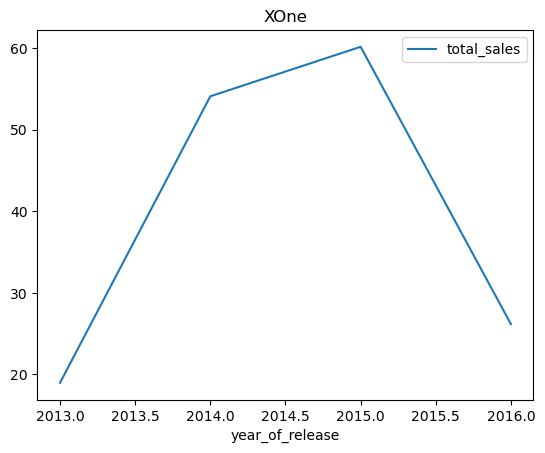

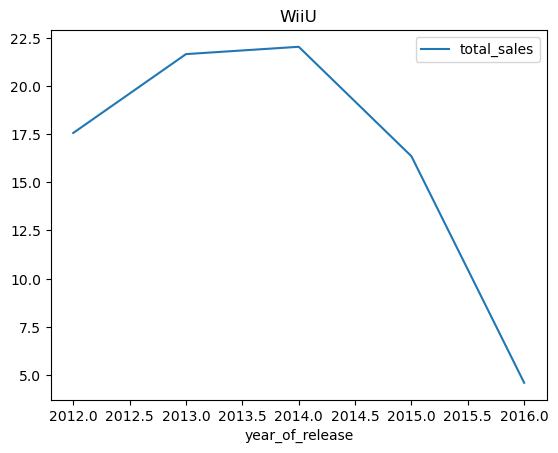

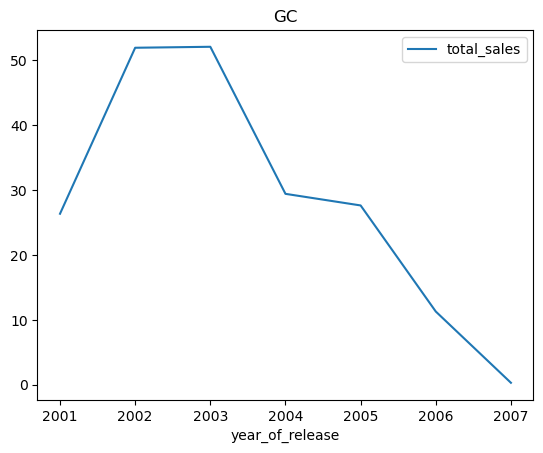

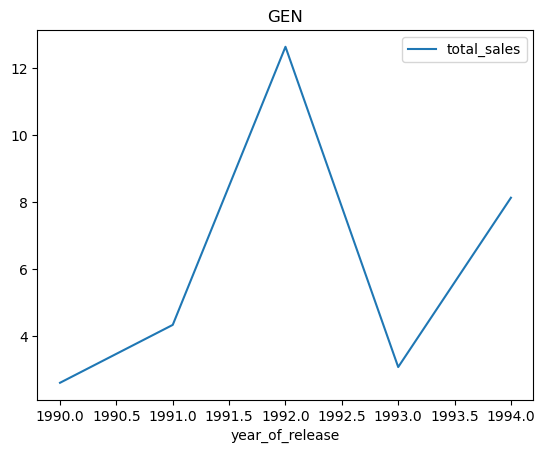

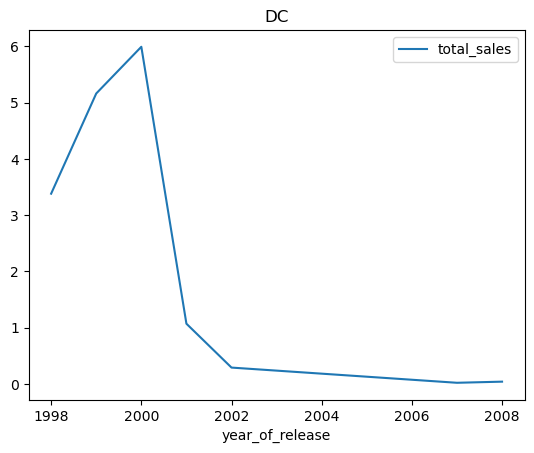

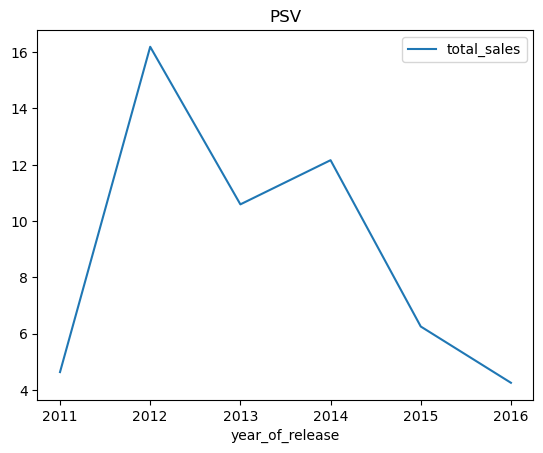

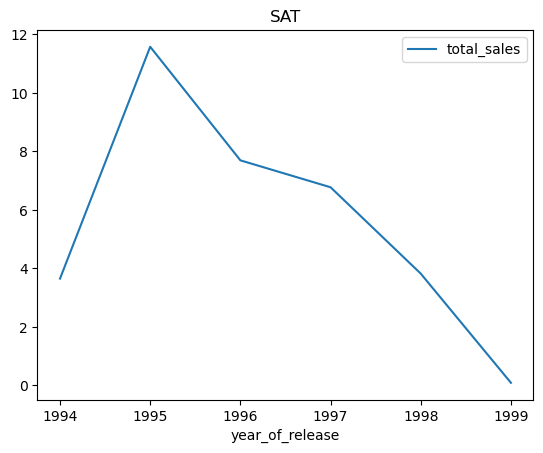

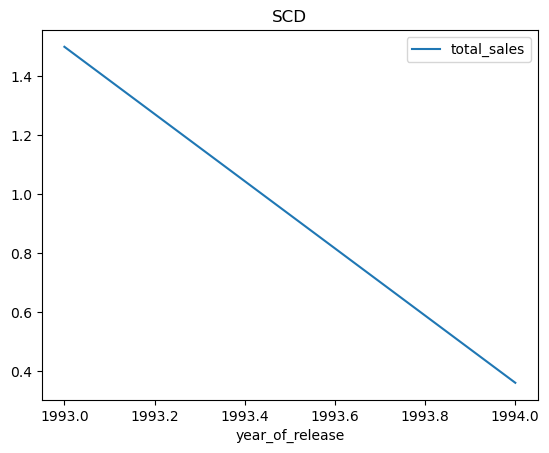

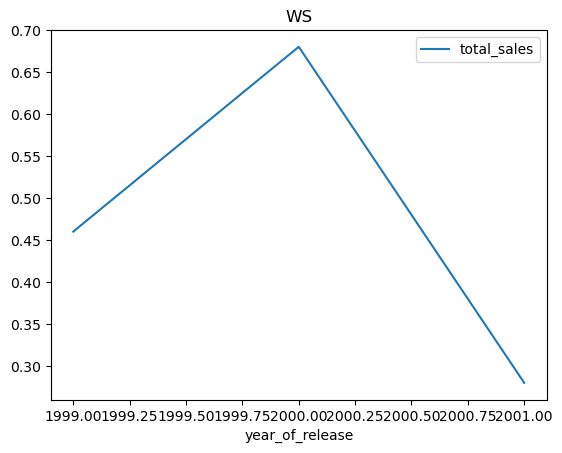

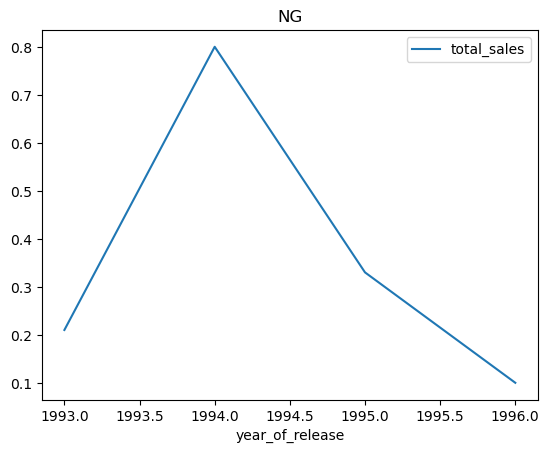

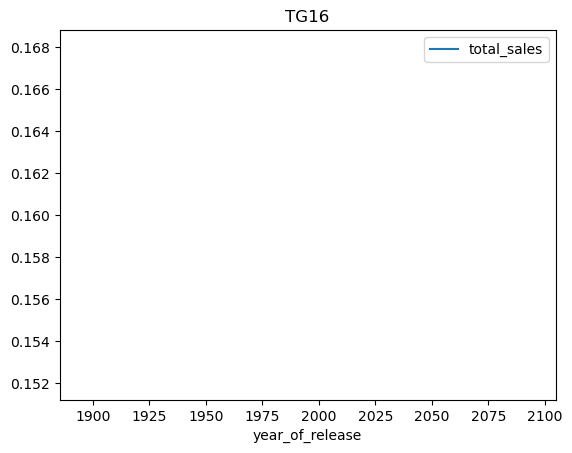

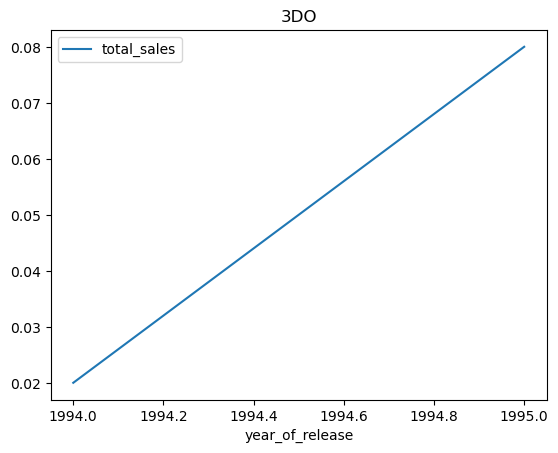

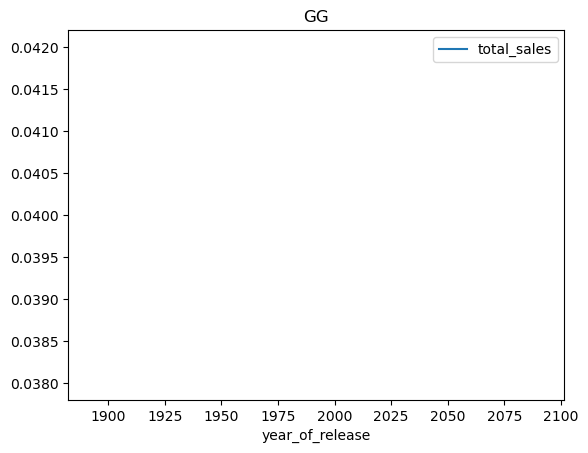

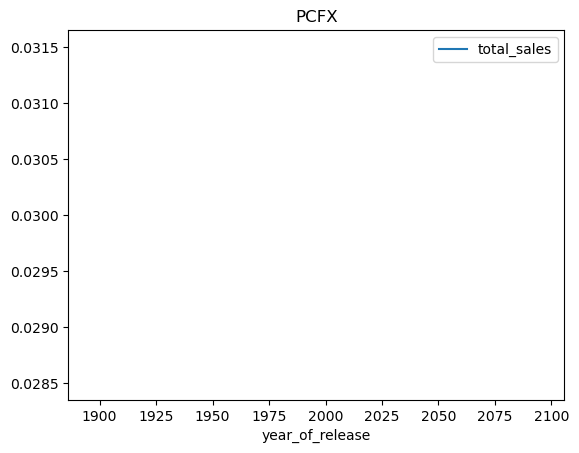

In [10]:
for platform in platforms:
    sale_plat_year.loc[sale_plat_year['platform'] == platform].plot(x='year_of_release', y='total_sales', title=platform)

GBA, PS, PS2, DS, GB and NES used to be very popular. However, now their selling amount largely reduce, some even goes to zero.
Overall, the platforms last about 4-8 years. Only super success platform may last 10 years or longer. However, PC is an outlier of the platforms that been popular for more than 30 years.  

##### 2.3. Study based on the most popular platform ever

    According to the research above, PS2 won most profit in its history. Hence we are going to build a distribution based on data for each year of PS2.

In [11]:
#creating a dataframe for PS2 from original dataframe
df_ps2 = df.loc[df['platform'] == 'PS2']
display(df_ps2.head())
display(df_ps2.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 17 to 16709
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2161 non-null   object 
 1   platform         2161 non-null   object 
 2   year_of_release  2161 non-null   int64  
 3   genre            2161 non-null   object 
 4   na_sales         2161 non-null   float64
 5   eu_sales         2161 non-null   float64
 6   jp_sales         2161 non-null   float64
 7   other_sales      2161 non-null   float64
 8   critic_score     2161 non-null   float64
 9   user_score       2161 non-null   float64
 10  rating           2161 non-null   object 
 11  total_sales      2161 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 219.5+ KB


None

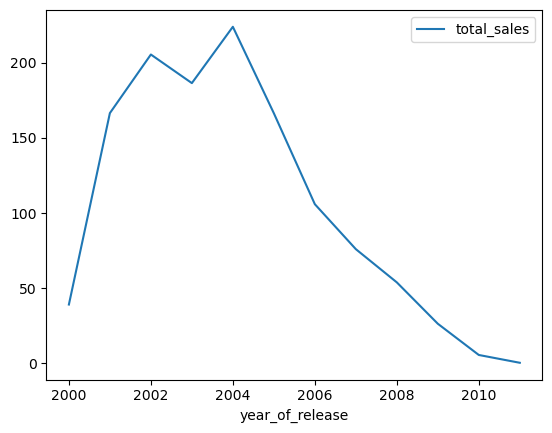

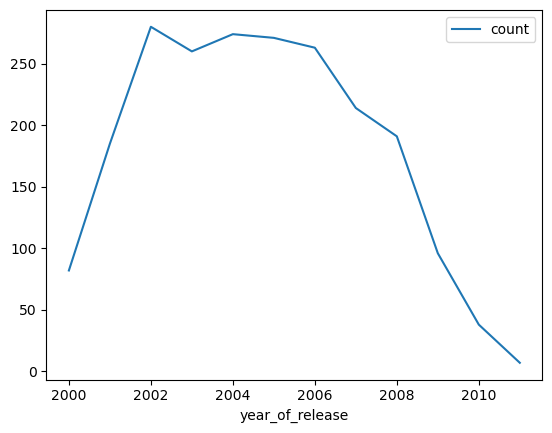

In [21]:
#Total sales changed by year
ps2_sales_year = df_ps2.groupby(['year_of_release']).sum('total_sales')['total_sales'].to_frame().reset_index()
ps2_sales_year.plot(x='year_of_release', y='total_sales')
plt.show()
ps2_count_year = df_ps2.groupby(['year_of_release']).sum('total_sales')['total_sales'].to_frame().reset_index()
#Game numbers changed by year
ps2_gameno_year = df_ps2.groupby('year_of_release').count()['name'].reset_index()
ps2_gameno_year = ps2_gameno_year.rename(columns={'name': 'count'})
ps2_gameno_year.plot(x='year_of_release', y='count')
plt.show()